In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from itertools import cycle
import numpy as np

In [3]:
df = pd.read_csv('/home/oem/workspace/pyhealthmon/health.csv', parse_dates=["date"])

In [4]:
df.tail()

,date,calm,joy,unified,reflection,community,generosity,patience,clarity,healing,effort
7,2024-01-05 00:00:00.000000,8,8,8,7,8,8,8,8,8,9
8,2024-01-06 00:00:00.000000,9,9,8,7,9,9,9,8,8,8
9,2024-01-07 00:00:00.000000,7,8,8,7,7,8,8,8,7,9
10,2024-01-13 15:43:57.622331,8,8,8,8,8,8,8,8,8,8
11,2024-01-14 11:59:41.686932,8,6,7,9,9,8,8,8,8,9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        12 non-null     datetime64[ns]
 1   calm        12 non-null     int64         
 2   joy         12 non-null     int64         
 3   unified     12 non-null     int64         
 4   reflection  12 non-null     int64         
 5   community   12 non-null     int64         
 6   generosity  12 non-null     int64         
 7   patience    12 non-null     int64         
 8   clarity     12 non-null     int64         
 9   healing     12 non-null     int64         
 10  effort      12 non-null     int64         
dtypes: datetime64[ns](1), int64(10)
memory usage: 1.2 KB


In [6]:
# may the wholesome karma of my meditation be dedicated to limitless beings
df['calm'].sum() + df['joy'].sum() + df['unified'].sum() + df['reflection'].sum()

358

In [7]:
df = df.drop('date', axis=1)
df.describe()

,calm,joy,unified,reflection,community,generosity,patience,clarity,healing,effort
count,12.000000,12.000000,12.0000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00,12.000000
mean,7.500000,7.666667,7.5000,7.166667,7.833333,7.916667,7.416667,7.500000,7.50,8.250000
std,0.797724,0.984732,0.6742,1.029857,0.834847,0.668558,1.164500,1.087115,1.00,0.753778
min,6.000000,6.000000,6.0000,5.000000,6.000000,7.000000,5.000000,5.000000,5.00,7.000000
25%,7.000000,7.000000,7.0000,7.000000,7.750000,7.750000,6.750000,7.000000,7.75,8.000000
50%,7.500000,8.000000,8.0000,7.000000,8.000000,8.000000,8.000000,8.000000,8.00,8.000000
75%,8.000000,8.000000,8.0000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00,9.000000
max,9.000000,9.000000,8.0000,9.000000,9.000000,9.000000,9.000000,9.000000,8.00,9.000000


In [8]:
df.sum()

calm          90
joy           92
unified       90
reflection    86
community     94
generosity    95
patience      89
clarity       90
healing       90
effort        99
dtype: int64

In [9]:
health_variables = df.columns[1:]
health_variables

Index(['joy', 'unified', 'reflection', 'community', 'generosity', 'patience',
       'clarity', 'healing', 'effort'],
      dtype='object')

In [10]:
sns.color_palette('husl')

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]

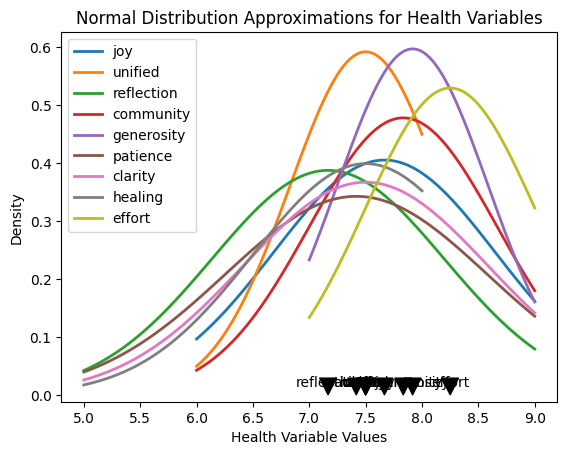

In [11]:
# Get a cyclic color iterator
colors = cycle(sns.color_palette('husl'))

# Plot normal distribution approximations for each health variable
for variable in health_variables:
    # Plot normal distribution curve
    mu, std = df[variable].mean(), df[variable].std()
    x = np.linspace(df[variable].min(), df[variable].max(), 100)
    p = norm.pdf(x, mu, std)
    
    # Plot the curve
    plt.plot(x, p, label=variable, linewidth=2)

    # Add a line from the curve to the legend
    plt.annotate(variable, xy=(mu, 0), xytext=(mu, 0.01),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='center', verticalalignment='bottom')

# Add legend and labels
plt.legend()
plt.xlabel("Health Variable Values")
plt.ylabel("Density")
plt.title("Normal Distribution Approximations for Health Variables")

# Show the plot
plt.show()

<Axes: >

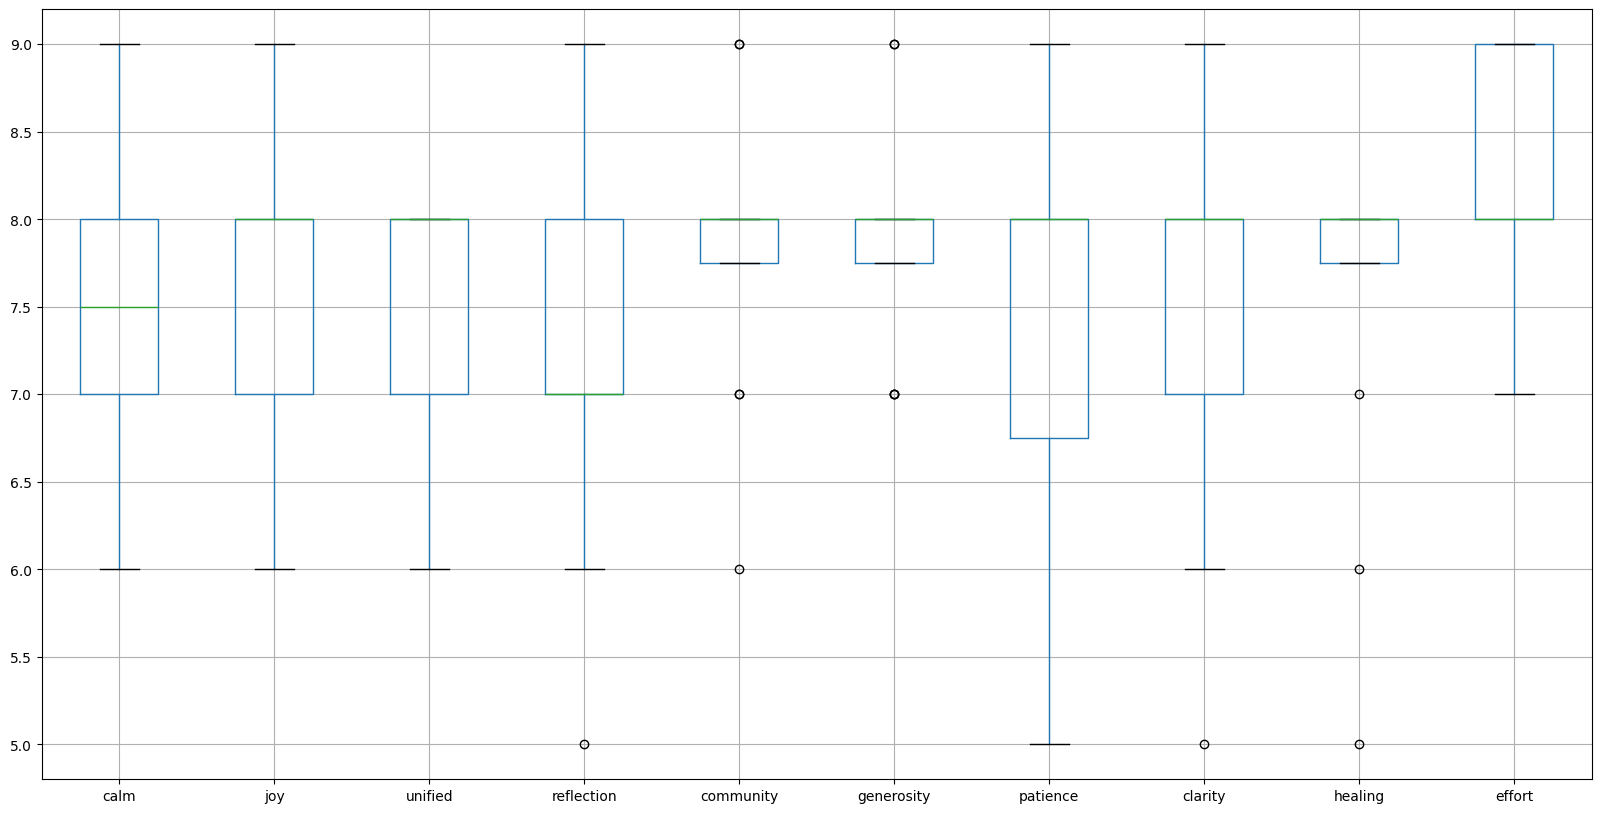

In [14]:
df.boxplot(figsize=(20, 10))
